# SR1.5 21 year mean recategorisation SI section

In [1]:
import pyam
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("plotting_template.mplstyle")

<IPython.core.display.Javascript object>

# Load the SR1.5 data

In [2]:
df_sr15 = pyam.read_iiasa(
    name="iamc15",
    model="*",
    variable="AR5 climate diagnostics*",
    meta=["category"]
)

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.iiasa - INFO: You are connected to the IXSE_SR15 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/about
pyam.iiasa - INFO: You are connected as an anonymous user


# Pull out the exceedance probability and median temperature variables

In [3]:
metric_variables = [
    "AR5 climate diagnostics|Temperature|Exceedance Probability|1.5 °C|MAGICC6",
    "AR5 climate diagnostics|Temperature|Exceedance Probability|2.0 °C|MAGICC6",
    "AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED"
]

In [4]:
df_metric_variables = df_sr15.filter(
    variable=metric_variables
).timeseries()

In [5]:
df_metric_variables.head(3)

2000  \
model       scenario               region variable                                           unit             
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  AR5 climate diagnostics|Temperature|Exceedance ... -     0.000000   
                                          AR5 climate diagnostics|Temperature|Exceedance ... -     0.000000   
                                          AR5 climate diagnostics|Temperature|Global Mean... °C    0.711019   

                                                                                                       2001  \
model       scenario               region variable                                           unit             
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  AR5 climate diagnostics|Temperature|Exceedance ... -     0.000000   
                                          AR5 climate diagnostics|Temperature|Exceedance ... -     0.000000   
                                          AR5 climate diagnostics|Temperature|Global Mean... °C    0.737667   

                                                                                                       2002  \
model       scenario               region variable                                           unit             
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  AR5 climate diagnostics|Temperature|Exceedance ... -     0.000000   
                                          AR5 climate diagnostics|Temperature|Exceedance ... -     0.000000   
                                          AR5 climate diagnostics|Temperature|Global Mean... °C    0.759933   

                                                                                                       2003  \
model       scenario               region variable                                           unit             
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  AR5 climate diagnostics|Temperature|Exceedance ... -     0.000000   
                                          AR5 climate diagnostics|Temperature|Exceedance ... -     0.000000   
                                          AR5 climate diagnostics|Temperature|Global Mean... °C    0.776514   

                                                                                                       2004  \
model       scenario               region variable                                           unit             
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  AR5 climate diagnostics|Temperature|Exceedance ... -     0.000000   
                                          AR5 climate diagnostics|Temperature|Exceedance ... -     0.000000   
                                          AR5 climate diagnostics|Temperature|Global Mean... °C    0.790307   

                                                                                                       2005  \
model       scenario               region variable                                           unit             
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  AR5 climate diagnostics|Temperature|Exceedance ... -     0.000000   
                                          AR5 climate diagnostics|Temperature|Exceedance ... -     0.000000   
                                          AR5 climate diagnostics|Temperature|Global Mean... °C    0.804564   

                                                                                                       2006  \
model       scenario               region variable                                           unit             
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  AR5 climate diagnostics|Temperature|Exceedance ... -     0.000000   
                                          AR5 climate diagnostics|Temperature|Exceedance ... -     0.000000   
                                          AR5 climate diagnostics|Temperature|Global Mean... °C    0.822495   

                                                                                                       2007  \
model       scenario               region variable                                           unit   

Now, we extend the pathways to 2110 assuming the value is the same as 2100.

In [6]:
for y in range(2101, 2111):
    df_metric_variables[y]=df_metric_variables[2100]

In [7]:
df_metric_variables_rolling_mean = (
    df_metric_variables
    .rolling(
        #21,
        11,
        center=True,
        axis=1
    )
    .mean()
    .dropna(axis=1)
)

In [8]:
df_metric_variables_rolling_mean.reset_index(inplace = True)

In [9]:
df_metric_variables_rolling_mean["variable"] = df_metric_variables_rolling_mean["variable"].apply(
    lambda x: x.replace(
        "MAGICC6","MAGICC6|Rolling Mean"
    )
)

In [10]:
df_metric_variables_rolling_mean["variable"].unique()

array(['AR5 climate diagnostics|Temperature|Exceedance Probability|1.5 °C|MAGICC6|Rolling Mean',
       'AR5 climate diagnostics|Temperature|Exceedance Probability|2.0 °C|MAGICC6|Rolling Mean',
       'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|Rolling Mean|MED'],
      dtype=object)

In [11]:
df_metric_variables_rolling_mean_pyam = pyam.IamDataFrame(df_metric_variables_rolling_mean)

In [12]:
df_sr15.append(
    df_metric_variables_rolling_mean_pyam,
    inplace=True
)

# Now we want to recategorise the data

In [13]:
def warming_exceedance_prob(x):
    return "AR5 climate diagnostics|Temperature|Exceedance Probability|{} °C|MAGICC6|Rolling Mean".format(x)


In [14]:
df_sr15.set_meta(
    meta="uncategorized",
    name="Category_rolling_mean"
)

In [15]:
df_sr15.set_meta(
    meta="uncategorized",
    name="rolling_mean_2100"
)

In [16]:
df_sr15.set_meta(
    meta="uncategorized",
    name="peak_rolling_mean"
)

In [17]:
pyam.categorize(
    df_sr15,
    value="1.5C in 2100 (50%)",
    name="rolling_mean_2100",
    criteria={warming_exceedance_prob(1.5):{"up":0.50, "year":2100}}
)

pyam.core - INFO: 88 scenarios categorized as `rolling_mean_2100: 1.5C in 2100 (50%)`


In [18]:
df_sr15.set_meta(
    meta=">1.5C in 2100 (50%)",
    name="rolling_mean_2100",
    index=df_sr15.filter(
        rolling_mean_2100="uncategorized" 
    )
)

In [19]:
pyam.categorize(
    df_sr15,
    value="low overshoot",
    name="peak_rolling_mean",
    criteria={warming_exceedance_prob(1.5):{"up":0.67}}
)

pyam.core - INFO: 67 scenarios categorized as `peak_rolling_mean: low overshoot`


In [20]:
df_sr15.set_meta(
    name="Category_rolling_mean",
    meta="1.5C low overshoot",
    index=df_sr15.filter(
        peak_rolling_mean="low overshoot",
        rolling_mean_2100="1.5C in 2100 (50%)"
    )
)

In [21]:
df_sr15.set_meta(
    name="Category_rolling_mean",
    meta="1.5C high overshoot",
    index=df_sr15.filter(
        peak_rolling_mean="uncategorized",
        rolling_mean_2100="1.5C in 2100 (50%)"
    )
)

In [22]:
pyam.categorize(
    df_sr15,
    value="Lower 2C",
    name="peak_rolling_mean",
    criteria={warming_exceedance_prob(2.0):{"up":0.34}}
)

pyam.core - INFO: 166 scenarios categorized as `peak_rolling_mean: Lower 2C`


In [23]:
df_sr15.set_meta(
    name="Category_rolling_mean",
    meta="Lower 2C",
    index=df_sr15.filter(
        peak_rolling_mean="Lower 2C",
        rolling_mean_2100=">1.5C in 2100 (50%)"
    )
)

In [24]:
df_sr15.set_meta(
    name="Category_rolling_mean",
    meta="Misc",
    index=df_sr15.filter(
        Category_rolling_mean="uncategorized"
    )
)

# Now we want to compare the number of scenarios in each category

In [25]:
df_sr15_downselected = df_sr15.filter(
    category=["Below 1.5C", "1.5C*", "Lower 2C"]
)

First, we assign peak exceedance probabilities and peak temperature to the meta data columns.

In [26]:
df_sr15_downselected.set_meta_from_data(
    variable="AR5 climate diagnostics|Temperature|Exceedance Probability|1.5 °C|MAGICC6",
    method=np.max,
    name="peak_exceedance_1p5"
)

In [27]:
df_sr15_downselected.set_meta_from_data(
    variable="AR5 climate diagnostics|Temperature|Exceedance Probability|1.5 °C|MAGICC6",
    year=2100,
    name="exceedance_1p5_2100"
)

In [28]:
df_sr15_downselected.set_meta_from_data(
    variable="AR5 climate diagnostics|Temperature|Exceedance Probability|2.0 °C|MAGICC6",
    method=np.max,
    name="peak_exceedance_2p0"
)

In [29]:
df_sr15_downselected.set_meta_from_data(
    variable="AR5 climate diagnostics|Temperature|Exceedance Probability|2.0 °C|MAGICC6",
    year=2100,
    name="exceedance_2p0_2100"
)

In [30]:
df_sr15_downselected.set_meta_from_data(
    variable="AR5 climate diagnostics|Temperature|Exceedance Probability|1.5 °C|MAGICC6|Rolling Mean",
    method=np.max,
    name="peak_exceedance_1p5_rolling"
)

In [31]:
df_sr15_downselected.set_meta_from_data(
    variable="AR5 climate diagnostics|Temperature|Exceedance Probability|1.5 °C|MAGICC6|Rolling Mean",
    year=2100,
    name="exceedance_1p5_rolling_2100"
)

In [32]:
df_sr15_downselected.set_meta_from_data(
    variable="AR5 climate diagnostics|Temperature|Exceedance Probability|2.0 °C|MAGICC6|Rolling Mean",
    method=np.max,
    name="peak_exceedance_2p0_rolling"
)

In [33]:
df_sr15_downselected.set_meta_from_data(
    variable="AR5 climate diagnostics|Temperature|Exceedance Probability|2.0 °C|MAGICC6|Rolling Mean",
    year=2100,
    name="exceedance_2p0_rolling_2100"
)

In [34]:
df_sr15_downselected.set_meta_from_data(
    variable="AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED",
    method=np.max,
    name="peak_temp"
)

In [35]:
df_sr15_downselected.set_meta_from_data(
    variable="AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|Rolling Mean|MED",
    method=np.max,
    name="peak_temp_rolling"
)

In [36]:
analysis_data = df_sr15_downselected.meta

First, we want to set Below 1.5C to 1.5C low overshoot.

In [37]:
analysis_data["category"]=analysis_data["category"].apply(
    lambda x: "1.5C low overshoot" if x=="Below 1.5C" else x
)

In [38]:
analysis_data["match_category"]=False

In [39]:
analysis_data["match_category"]=analysis_data.apply(lambda x: True if x["category"]==x["Category_rolling_mean"] else False,axis=1)

In [40]:
analysis_data.groupby(["match_category", "category"])["exclude"].count()

match_category  category           
False           1.5C high overshoot     3
True            1.5C high overshoot    34
                1.5C low overshoot     53
                Lower 2C               74
Name: exclude, dtype: int64

In [41]:
analysis_data[analysis_data["match_category"]==False]

category version  \
model                 scenario                                              
IMAGE 3.0.1           IMA15-LoNCO2            1.5C high overshoot       1   
REMIND 1.7            ADVANCE_2030_Price1.5C  1.5C high overshoot       1   
REMIND-MAgPIE 1.7-3.0 SMP_2C_regul            1.5C high overshoot       1   

                                              exclude Category_rolling_mean  \
model                 scenario                                                
IMAGE 3.0.1           IMA15-LoNCO2              False    1.5C low overshoot   
REMIND 1.7            ADVANCE_2030_Price1.5C    False              Lower 2C   
REMIND-MAgPIE 1.7-3.0 SMP_2C_regul              False              Lower 2C   

                                                rolling_mean_2100  \
model                 scenario                                      
IMAGE 3.0.1           IMA15-LoNCO2             1.5C in 2100 (50%)   
REMIND 1.7            ADVANCE_2030_Price1.5C  >1.5C in 2100 (50%)   
REMIND-MAgPIE 1.7-3.0 SMP_2C_regul            >1.5C in 2100 (50%)   

                                             peak_rolling_mean  \
model                 scenario                                   
IMAGE 3.0.1           IMA15-LoNCO2                    Lower 2C   
REMIND 1.7            ADVANCE_2030_Price1.5C          Lower 2C   
REMIND-MAgPIE 1.7-3.0 SMP_2C_regul                    Lower 2C   

                                              peak_exceedance_1p5  \
model                 scenario                                      
IMAGE 3.0.1           IMA15-LoNCO2                       0.680000   
REMIND 1.7            ADVANCE_2030_Price1.5C             0.890000   
REMIND-MAgPIE 1.7-3.0 SMP_2C_regul                       0.756667   

                                              exceedance_1p5_2100  \
model                 scenario                                      
IMAGE 3.0.1           IMA15-LoNCO2                       0.301667   
REMIND 1.7            ADVANCE_2030_Price1.5C             0.486667   
REMIND-MAgPIE 1.7-3.0 SMP_2C_regul                       0.500000   

                                              peak_exceedance_2p0  \
model                 scenario                                      
IMAGE 3.0.1           IMA15-LoNCO2                       0.135000   
REMIND 1.7            ADVANCE_2030_Price1.5C             0.348333   
REMIND-MAgPIE 1.7-3.0 SMP_2C_regul                       0.193333   

                                              exceedance_2p0_2100  \
model                 scenario                                      
IMAGE 3.0.1           IMA15-LoNCO2                       0.075000   
REMIND 1.7            ADVANCE_2030_Price1.5C             0.136667   
REMIND-MAgPIE 1.7-3.0 SMP_2C_regul                       0.140000   

                                              peak_exceedance_1p5_rolling  \
model                 scenario                                              
IMAGE 3.0.1           IMA15-LoNCO2                               0.667121   
REMIND 1.7            ADVANCE_2030_Price1.5C                     0.883485   
REMIND-MAgPIE 1.7-3.0 SMP_2C_regul                               0.751970   

                                              exceedance_1p5_rolling_2100  \
model                 scenario                                              
IMAGE 3.0.1           IMA15-LoNCO2                               0.307273   
REMIND 1.7            ADVANCE_2030_Price1.5C                     0.501667   
REMIND-MAgPIE 1.7-3.0 SMP_2C_regul                               0.508333   

                                              peak_exceedance_2p0_rolling  \
model                 scenario                                              
IMAGE 3.0.1           IMA15-LoNCO2                               0.132576   
REMIND 1.7            ADVANCE_2030_Price1.5C                     0.339545   
REMIND-MAgPIE 1.7-3.0 SMP_2C_regul                               0.190758   

                                              exceedance

# Compare the disparity between the peak characteristics and describe

In [42]:
analysis_data["perc_1p5_exceedance"] = (analysis_data["peak_exceedance_1p5_rolling"] - analysis_data["peak_exceedance_1p5"]) / analysis_data["peak_exceedance_1p5"]

In [43]:
analysis_data["perc_2p0_exceedance"] = (analysis_data["peak_exceedance_2p0_rolling"] - analysis_data["peak_exceedance_2p0"]) / analysis_data["peak_exceedance_2p0"]

In [44]:
analysis_data["perc_1p5_exceedance_2100"] = (analysis_data["exceedance_1p5_rolling_2100"] - analysis_data["exceedance_1p5_2100"]) / analysis_data["exceedance_1p5_rolling_2100"]

In [45]:
(analysis_data[ 
    ["perc_1p5_exceedance", "perc_2p0_exceedance", "perc_1p5_exceedance_2100"]
]*100).describe().round(1)

perc_1p5_exceedance  perc_2p0_exceedance  perc_1p5_exceedance_2100
count                164.0                164.0                     164.0
mean                  -0.8                 -1.6                       1.8
std                    0.7                  1.3                       1.7
min                   -3.4                 -5.9                      -1.0
25%                   -1.1                 -2.5                       0.5
50%                   -0.6                 -1.3                       1.6
75%                   -0.3                 -0.7                       2.6
max                    0.0                  0.0                      10.2

In [46]:
false_matches = analysis_data[analysis_data["match_category"]==False]

In [47]:
false_matches_lo = false_matches[false_matches["Category_rolling_mean"]=="1.5C low overshoot"]

In [48]:
false_matches_lo

category version  exclude  \
model       scenario                                             
IMAGE 3.0.1 IMA15-LoNCO2  1.5C high overshoot       1    False   

                         Category_rolling_mean   rolling_mean_2100  \
model       scenario                                                 
IMAGE 3.0.1 IMA15-LoNCO2    1.5C low overshoot  1.5C in 2100 (50%)   

                         peak_rolling_mean  peak_exceedance_1p5  \
model       scenario                                              
IMAGE 3.0.1 IMA15-LoNCO2          Lower 2C                 0.68   

                          exceedance_1p5_2100  peak_exceedance_2p0  \
model       scenario                                                 
IMAGE 3.0.1 IMA15-LoNCO2             0.301667                0.135   

                          exceedance_2p0_2100  peak_exceedance_1p5_rolling  \
model       scenario                                                         
IMAGE 3.0.1 IMA15-LoNCO2                0.075                     0.667121   

                          exceedance_1p5_rolling_2100  \
model       scenario                                    
IMAGE 3.0.1 IMA15-LoNCO2                     0.307273   

                          peak_exceedance_2p0_rolling  \
model       scenario                                    
IMAGE 3.0.1 IMA15-LoNCO2                     0.132576   

                          exceedance_2p0_rolling_2100  peak_temp  \
model       scenario                                               
IMAGE 3.0.1 IMA15-LoNCO2                     0.075303   1.608863   

                          peak_temp_rolling  match_category  \
model       scenario                                          
IMAGE 3.0.1 IMA15-LoNCO2           1.604589           False   

                          perc_1p5_exceedance  perc_2p0_exceedance  \
model       scenario                                                 
IMAGE 3.0.1 IMA15-LoNCO2            -0.018939            -0.017957   

                          perc_1p5_exceedance_2100  
model       scenario                                
IMAGE 3.0.1 IMA15-LoNCO2                  0.018245

Text(0, 0.5, 'Peak exceedance 1p5 smooth')

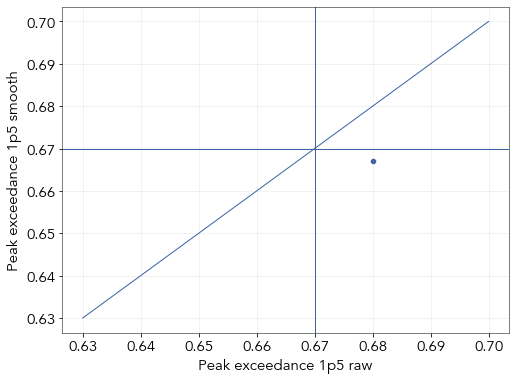

In [49]:
fig1, ax1=plt.subplots()

sns.scatterplot(
    x="peak_exceedance_1p5",
    y="peak_exceedance_1p5_rolling",
    data=false_matches_lo,
    ax=ax1
)

ax1.plot([0.63, 0.7], [0.63, 0.7])
ax1.axvline(0.67)
ax1.axhline(0.67)
ax1.set_xlabel("Peak exceedance 1p5 raw")
ax1.set_ylabel("Peak exceedance 1p5 smooth")

In [50]:
false_matches_hi = false_matches[false_matches["Category_rolling_mean"]=="Lower 2C"]

In [51]:
false_matches_hi.columns

Index(['category', 'version', 'exclude', 'Category_rolling_mean',
       'rolling_mean_2100', 'peak_rolling_mean', 'peak_exceedance_1p5',
       'exceedance_1p5_2100', 'peak_exceedance_2p0', 'exceedance_2p0_2100',
       'peak_exceedance_1p5_rolling', 'exceedance_1p5_rolling_2100',
       'peak_exceedance_2p0_rolling', 'exceedance_2p0_rolling_2100',
       'peak_temp', 'peak_temp_rolling', 'match_category',
       'perc_1p5_exceedance', 'perc_2p0_exceedance',
       'perc_1p5_exceedance_2100'],
      dtype='object')

Text(0, 0.5, 'Exceedance 2100 1p5 smooth')

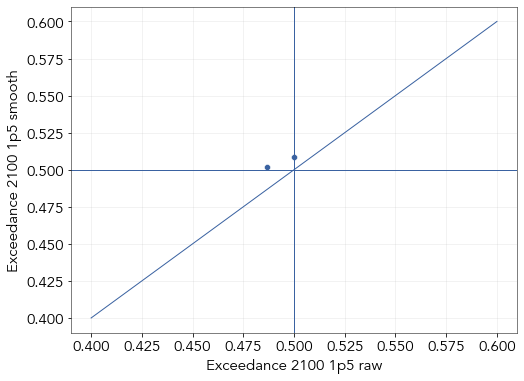

In [52]:
fig1, ax1=plt.subplots()

sns.scatterplot(
    x="exceedance_1p5_2100",
    y="exceedance_1p5_rolling_2100",
    data=false_matches_hi,
    ax=ax1
)

ax1.plot([0.4, 0.6], [0.4, 0.6])
ax1.axvline(0.5)
ax1.axhline(0.5)
ax1.set_xlabel("Exceedance 2100 1p5 raw")
ax1.set_ylabel("Exceedance 2100 1p5 smooth")